# Tutorial 1: Data Exploration and regression analysis

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

<h2>Tutorial Outline<span class="tocSkip"></span></h2>
<hr>
<div class="toc"><ul class="toc-item">
<li><span><a href="#1.-Introducing the packages" data-toc-modified-id="1.-Introducing-the-packages-2">1. Introducing the packages</a></span></li>
<li><span><a href="#2.-" data-toc-modified-id="2.-Reading-the-data-and-having-a-first-look-3">2. Reading the data and having a first look</a></span></li>
<li><span><a href="#3.-" data-toc-modified-id="3.-Exploratory-data-analysis-4">3. Exploratory data analysis</a></span></li>
<li><span><a href="#4.-" data-toc-modified-id="4.-Creating new variables-5">4. Creating new variables</a></span></li>
<li><span><a href="#5.-" data-toc-modified-id="5.-Nonlinear-relationships-6">5. Nonlinear relationships </a></span></li></ul></div>

## Learning Objectives
<hr>

- Work with Pandas DataFrames with real-world data.
- Introducing basic functions to explore and understand the data.
- Learn how to Make distribution plots of the data
- Create a correlation map
- Create new variables

## 1.Introducing the packages
<hr>

Within this tutorial, we are going to make use of the following packages: 

[**seaborn**](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

[**NumPy**](https://numpy.org/doc/stable/) is a Python library that provides a multidimensional array object, various derived objects, and an assortment of routines for fast operations on arrays.

[**Pandas**](https://pandas.pydata.org/docs/) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.


*We will first need to install these packages in the cell below. Uncomment them to make sure we can pip install them*

In [ ]:
!pip install seaborn

Now we will import these packages in the cell below:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid",{'axes.grid' : True})

## 2.Reading the data and having a first look
<hr>

In [14]:
## Read the data using the pandas package
data = pd.read_csv(r"C:\Users\mtn308\Documents\Bigdatacourse\usadataforweek2tut1.csv")

The data we will use for the next two weeks is obtained from the IPUMS USA database. IPUMS USA provides census and survey data for households in the US. There are hundreds of variables included in the database. In the next line of code we read in a file with a short description of the variables that we selected for this tutorial. The dataset contains socio-demographic variables such as age, gender, education, but also economic variables, such as income, mortgage payments, etc. There are also variables about energy cost, like electricity cost, gas costs and fuel costs, and in these tutorial we are going to work towards two machine learning models that can predict energy costs per household. 

In [15]:
datadescription = pd.read_csv(r"C:\Users\mtn308\Documents\Bigdatacourse\shortdescription_ipumsusa_variables.csv", sep = ';', encoding = 'unicode_escape')
print(datadescription)

           Variable_name                                  Short_description  \
0                   YEAR                                        Census year   
1                 SAMPLE                            IPUMS sample identifier   
2                 SERIAL                            Household serial number   
3                   HHWT                                   Household weight   
4                 REGION                         Census region and division   
5               STATEFIP                                  State (FIPS code)   
6              COUNTYFIP                                 County (FIPS code)   
7                DENSITY                Population-weighted density of PUMA   
8                  METRO                                Metropolitan status   
9                   FARM                                        Farm status   
10    OWNERSHP (general)   Ownership of dwelling (tenure) [general version]   
11  OWNERSHPD (detailed)  Ownership of dwelling (ten

Now let’s take a look at the dataset.

In [16]:
data.head()

,Unnamed: 0,YEAR,SAMPLE,SERIAL,HHWT,REGION,STATEFIP,COUNTYFIP,DENSITY,METRO,...,EDUC,EDUCD,DEGFIELD,EMPSTAT,EMPSTATD,LABFORCE,OCC,IND,INCTOT,POVERTY
0,0,2019,201901,3,199.80,32,1,15,364.8,4,...,7,71,NaN,1.0,10,2,5240.0,9160.0,1400.0,NaN
1,1,2019,201901,13,639.36,32,1,0,129.3,0,...,6,65,NaN,3.0,30,1,NaN,NaN,0.0,NaN
2,2,2019,201901,23,869.13,32,1,0,2090.1,4,...,7,71,NaN,1.0,10,2,2350.0,7870.0,970.0,NaN
3,3,2019,201901,33,119.88,32,1,0,217.6,0,...,6,63,NaN,3.0,30,1,NaN,NaN,11100.0,84.0
4,4,2019,201901,43,769.23,32,1,97,2341.6,4,...,6,63,NaN,3.0,30,1,NaN,NaN,0.0,NaN


Data description
Beschrijf de variabelen
Gooi er nog een paar uit die je toch niet gebruikt. 

In [17]:
data.shape

(323958, 45)

QUESTION: What information does the function shape give you about the dataframe? 

In [ ]:
data.describe()

Let's find out the data types of the data and if there are non-null counts.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323958 entries, 0 to 323957
Data columns (total 50 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       323958 non-null  int64  
 1   SAMPLE     323958 non-null  int64  
 2   SERIAL     323958 non-null  int64  
 3   CBSERIAL   323958 non-null  float64
 4   HHWT       323958 non-null  float64
 5   CLUSTER    323958 non-null  float64
 6   REGION     323958 non-null  int64  
 7   STATEFIP   323958 non-null  int64  
 8   COUNTYFIP  323958 non-null  int64  
 9   DENSITY    323958 non-null  float64
 10  METRO      323958 non-null  int64  
 11  STRATA     323958 non-null  int64  
 12  GQ         323958 non-null  int64  
 13  FARM       323958 non-null  int64  
 14  OWNERSHP   308813 non-null  float64
 15  OWNERSHPD  308813 non-null  float64
 16  MORTGAGE   226643 non-null  float64
 17  MORTGAG2   147006 non-null  float64
 18  PROPINSR   226643 non-null  float64
 19  RENT       77317 non-nu

Another way to check if there are missing values by using the following line of code. 

In [8]:
data.isnull().sum().sort_values(ascending = False)

RENT         246641
DEGFIELD     240886
MORTGAG2     176952
IND          131639
OCC          131639
PROPINSR      97315
MORTGAGE      97315
EMPSTAT       56116
INCTOT        52176
BUILTYR2      15145
COSTFUEL      15145
OWNERSHPD     15145
OWNERSHP      15145
UNITSSTR      15145
HHINCOME      15145
ROOMS         15145
COSTGAS       15145
BEDROOMS      15145
FUELHEAT      15145
VEHICLES      15145
COSTELEC      15145
POVERTY       12835
FARM              0
GQ                0
SERIAL            0
CBSERIAL          0
HHWT              0
LABFORCE          0
EMPSTATD          0
CLUSTER           0
DEGFIELDD         0
REGION            0
EDUCD             0
EDUC              0
RACED             0
RACE              0
MARST             0
AGE               0
SEX               0
RELATED           0
RELATE            0
PERWT             0
PERNUM            0
STATEFIP          0
COUNTYFIP         0
DENSITY           0
METRO             0
SAMPLE            0
STRATA            0
YEAR              0


QUESTION: Can you describe what the line of code above is doing? Hint: Every dot (.) indicates a new function.

In [ ]:
## 3.Exploratory data analysis
<hr>

Now we are going to take a look at some specific variables. We want to see how variables are distributed and how they are related to each other, and specifically how they are related to energy costs. We can do this in several ways. 

Here we see the different values in the variable OWNERSHIP and how many times each value occurs. 

In [10]:
data['OWNERSHP'].value_counts(dropna = False)

6.0     59602
5.0     54206
7.0     44995
8.0     36478
4.0     35941
9.0     21301
3.0     15166
NaN     15145
10.0    15020
11.0     7118
12.0     4676
2.0      4274
1.0      3098
13.0     2428
14.0     1432
16.0     1285
17.0      687
18.0      528
15.0      510
19.0       35
20.0       33
Name: ROOMS, dtype: int64

In [14]:
data['HHINCOME'].value_counts(dropna = False)

NaN         15145
100000.0     2290
60000.0      2285
0.0          2173
50000.0      2167
            ...  
127720.0        1
145450.0        1
72410.0         1
349050.0        1
5070.0          1
Name: HHINCOME, Length: 12286, dtype: int64

QUESTION: Try a variable that you are interested in. 

The function value_counts is especially useful when the number of values in a variable is limited. For example, for income, which contains a lot of different values, value_counts is not so useful and a plot of the distribution would be more insightful. We can use the seaborn package to easily plot the distribution of the income.   

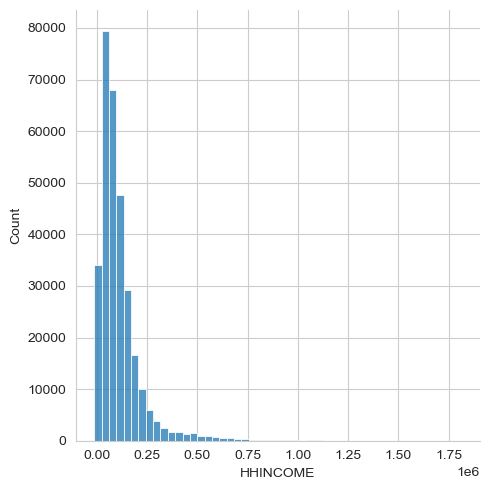

In [15]:
sns.displot(data['HHINCOME'], bins=50,kde=False)

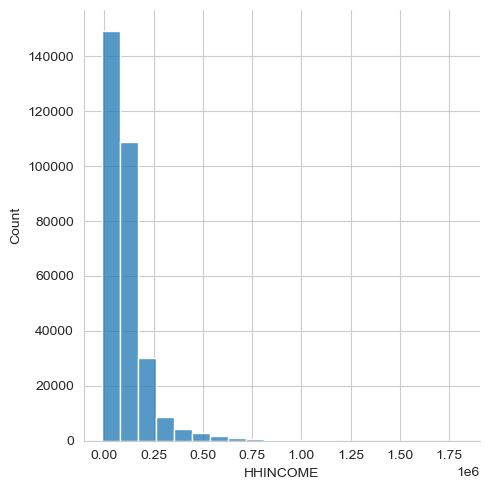

In [16]:
# Less bins
sns.displot(data['HHINCOME'], bins=20,kde=False)

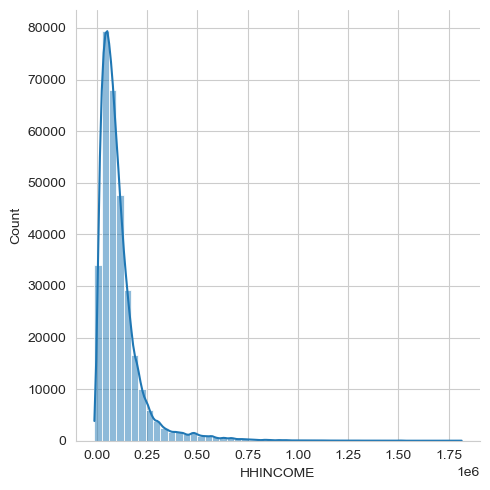

In [17]:
# With kernel density
sns.displot(data['HHINCOME'], bins=50,kde=True)

Now we are going to take a look at energy costs. The total costs of energy are given by electricity costs, gas costs and fuel costs. Before summing the three variables to obtain the total energy costs, we take a look at the three individual variables. 

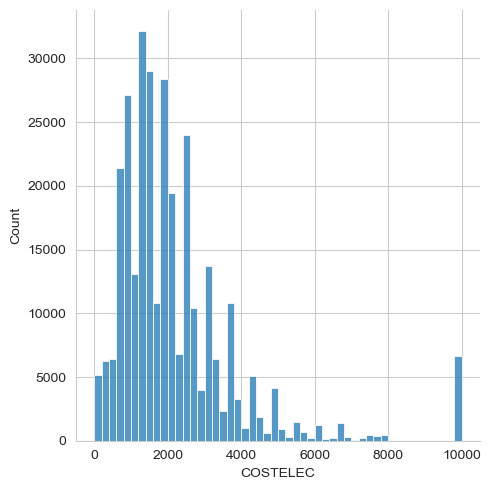

In [20]:
sns.displot(data['COSTELEC'], bins=50,kde=False)

QUESTION: There appears to be a strange value around 10000. Find out this value with a line of code. 

In [ ]:
# Answer. 

You can find on the IPUMS USA website what the value indicates, but this is optional. Anyhow, we should replace this value around 10000. Fill in the dots in the line of code below. The number you fill in is going to be replaced by 0.    

In [20]:
data['COSTELEC'] = data['COSTELEC'].replace(9997, 0) #data['COSTELEC'] = data['COSTELEC'].replace(..., 0)

Do the same for COSTFUEL and COSTGAS. The value to replace is the same as for COSTELEC. 

In [21]:
data['COSTFUEL'] = data['COSTFUEL'].replace(9997, 0) 


In [23]:
data['COSTGAS'] = data['COSTGAS'].replace(9997, 0) 

The total cost of energy is given by the sum of electricity, gas and fuel costs. The next line of code creates a new column in the dataframe called COSTENERGY, which is the sum of three columns. 

In [24]:
data['COSTENERGY'] = data['COSTELEC'] + data['COSTGAS'] + data['COSTFUEL']

Next we want to see how variables are related to each other. We can for example do this with a correlation matrix. You can add a few variables you are interested in yourself.
As you can see, there are several options in the seaborn (imported as sns) heatmap. We have annot = True which makes sure that we include the numbers in the heatmap (try switching it off), fmt = .2f specifies that we want to have 2 decimals, with cmap we can specify the color palette and with center = 0, we scale the colors in such a way that a correlation of 0 corresponds to white color.   


<AxesSubplot: >

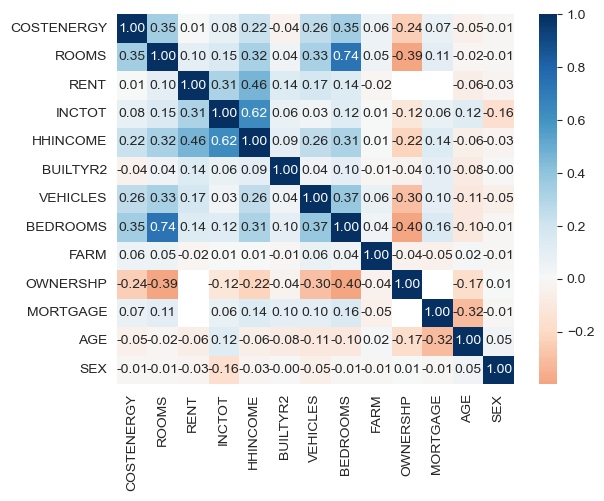

In [25]:
 sns.heatmap(data[["COSTENERGY", "ROOMS", "RENT", "INCTOT", "HHINCOME", "BUILTYR2", "VEHICLES", "BEDROOMS", "FARM", "OWNERSHP", "MORTGAGE", "AGE", "SEX"]].corr(),
                           annot=True, fmt = ".2f", center=0, cmap = "RdBu")

QUESTION: Which variable is most correlated to COSTENERGY and which variable the least?  

In [ ]:
# Answer

## 4.Creating new variables
<hr>

The dataset consists of households and individuals. Energy costs are a household variable, i.e. all members of the household have the same energy costs. Age and sex are individual variables, so the relationship between age or sex with energy costs is likely to be low. Think of a family with children, where a 3-year old daughter has the same energy costs as the 40-year old father. But maybe we can use these two variables, AGE and SEX in another way to make them useful. We can for example create a variable with number of children in a household, or number of women, age of the oldest person in the household etc. 
To create these variables, we need to know which individuals belong to the same household and luckily this is exactly what the column SERIAL indicates. 

Before we go into the variables SEX and AGE, we are going to create a new variable household size based on the variable SERIAL.

In [ ]:
serialcount = data['SERIAL'].value_counts(dropna = False).reset_index()

In [11]:
print(serialcount)

QUESTION: Explain the function value_counts. 

The names of the dataframe serialcount are a bit confusing, because index corresponds to the SERIAL number and the column SERIAL corresponds to the household size, so we rename the columns.

In [12]:
 serialcount = serialcount.rename(columns = {'SERIAL':'HHSIZE', 'index':'SERIAL'})

In [ ]:
Then we add the column household size to our data using the function merge. 

In [13]:
data = data.merge(serialcount, on = 'SERIAL', how = 'left')

QUESTION: Can you explain what this function does? Also explain the option 'on' and 'how'. 

Next we will use the variable SEX to create a new variable. It is possible that women use more energy than men, or the other way around, so the number of women (or men) could be a useful variable for predicting energy costs. To obtain the household size, we simply counted the number of occurances of each serial number, but to obtain the number of women per household, we also need the column SEX. The variable SEX has two values, 1 represents a male and 2 represents a female. 

We use the function value_count to obtain the number of women and men per serial number (household). 

In [14]:
gendercount = data[['SERIAL', 'SEX']].value_counts(dropna = False).reset_index()

In [15]:
print(gendercount)

         SERIAL  SEX   0
0        625037    2  13
1       1310431    2  13
2        163320    2  12
3        542360    2  12
4        777814    2  11
...         ...  ...  ..
227109   563059    2   1
227110   563069    1   1
227111   563069    2   1
227112   563079    1   1
227113  1428034    2   1

[227114 rows x 3 columns]


The following line of code produces the same results, can you explain what the code does? Hint: The line of code contains 3 functions, signalled by the . in front.

In [16]:
gendercount = data[['SERIAL','SEX']].groupby(['SERIAL','SEX']).size().reset_index()
print(gendercount)

In [ ]:
# Answer

In the next steps you are going to write code that merges a new variable called 'NR_OF_WOMEN' (number of women) to the dataframe. The following hints guide you through the steps. 
Hint 0: 3 lines of code is sufficient. Hint 1 is given for the first line of code, Hint 2 for the second line, and Hint 3a, 3b, 3c for the third line of code. 
Hint 1: You want to create a variable/column with number of women using the dataframe gendercount. The only thing you have to do is keep the number of the women in the dataframe gendercount, i.e. use SEX == 2. Save this dataframe as a new dataframe named womencount, hence your first line of code starts with womencount = .  
Hint 2: Change the variable name of 0 to NR_OF_WOMEN in the dataframe womencount. 0 is not a string (so it's not '0').  
Hint 3a: In the third line of code you merge the dataframe womencount women to the dataframe data.
Hint 3b: See the line of code where we merged serialcount to data. 
Hint 3c: Think about the column SEX. It has no meaning anymore, since you only kept the women. Hence, you can either drop it from the dataframe or not include it in the merge. If you choose to drop SEX from womencount, this would be your third line of code and the merge would be the fourth line of code.  


In [17]:
## Answer
womencount = gendercount[gendercount['SEX'] == 2]
womencount = womencount.rename(columns = {0:'NR_OF_WOMEN'})
data  = data.merge(gendercountwomen[['SERIAL', 'NR_OF_WOMEN']], on = 'SERIAL', how = 'left')

When you succesfully merged the number of women the dataframe, what do you do with the nan values? Fill in the dots.

In [18]:
data['NR_OF_WOMEN'] = data['NR_OF_WOMEN'].replace(np.nan, 0) # data['NR_OF_WOMEN'] = data['NR_OF_WOMEN'].replace(np.nan, ...) 

## 5.Nonlinear relationships
<hr>

We are going to create two new variables based on age. First we want to create a variable with the age of the oldest person.

In [19]:
 oldest = data[['SERIAL', 'AGE']].groupby('SERIAL').max().reset_index()

We want to change the name of the column AGE to OLDEST, because we already have a column AGE in the dataframe data. Then we merge it to the dataframe. 

In [20]:
oldest = oldest.rename(columns = {'AGE':'OLDEST'})
data = data.merge(oldest, on = 'SERIAL', how = 'left')

QUESTION: Now create a variable yourself with the age of the youngest person, named YOUNGEST, and add it to the dataframe data. 

In [21]:
# Answer. 
youngest = data[['SERIAL', 'AGE']].groupby('SERIAL').min().reset_index()
youngest = youngest.rename(columns = {'AGE':'YOUNGEST'})
data = data.merge(youngest, on = 'SERIAL', how = 'left')

Let's check if the correlation of the oldest and youngest person with energy costs is higher than the correlation of age with energy costs.

<AxesSubplot: >

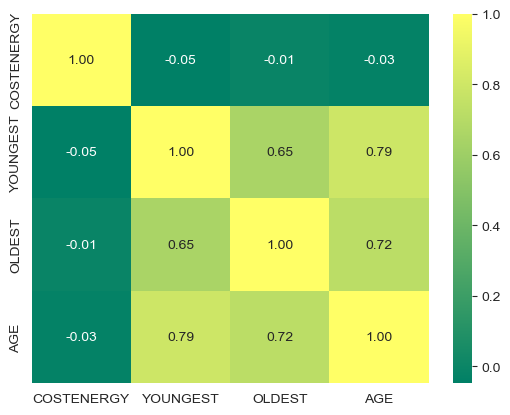

In [25]:
 sns.heatmap(data[["COSTENERGY","YOUNGEST", "OLDEST", "AGE"]].corr(),
                           annot=True, fmt = ".2f", center=0, cmap = "RdBu")

A possible explanation for the low correlation could be that the relationship between age and energy costs is not linear. Let's see the average energy costs over the age of the oldest person in the household in a barplot. 

([<matplotlib.axis.XTick at 0x14b4dc0fac0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95')])

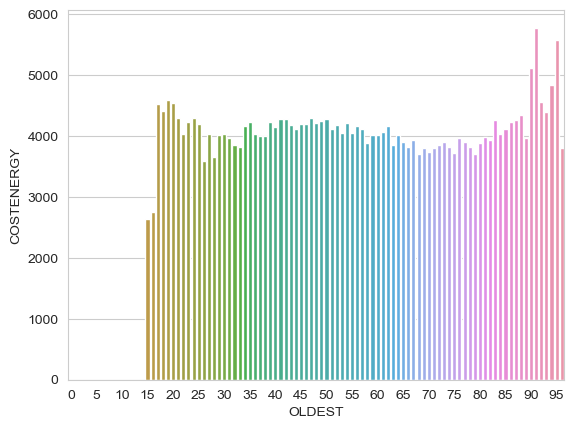

In [26]:
sns.barplot(x = 'OLDEST', y = 'COSTENERGY', data = data, errorbar = None)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]) #position of xticks. 

The differences are subtle and especially households with a person over 75 years old seem to use more energy than households with younger people. We can include confidence levels in the barplot to see if the differences in energy costs over age are significant.

C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._

([<matplotlib.axis.XTick at 0x14b50168e80>,
 [Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95')])

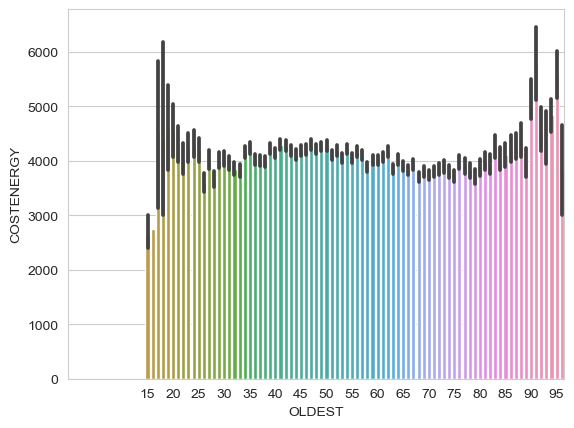

In [27]:
sns.barplot(x = 'OLDEST', y = 'COSTENERGY', data = data, errorbar = 'ci')
plt.xticks([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]) #position of xticks. 

In [28]:
## Let's see the barplot for age of the youngest person in the household.  
sns.barplot(x = 'YOUNGEST', y = 'COSTENERGY', data = data, errorbar = 'ci')
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]) #position of xticks.

C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\mtn308\.conda\envs\paper3geocube\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._

([<matplotlib.axis.XTick at 0x14b504aeef0>,
 [Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95')])

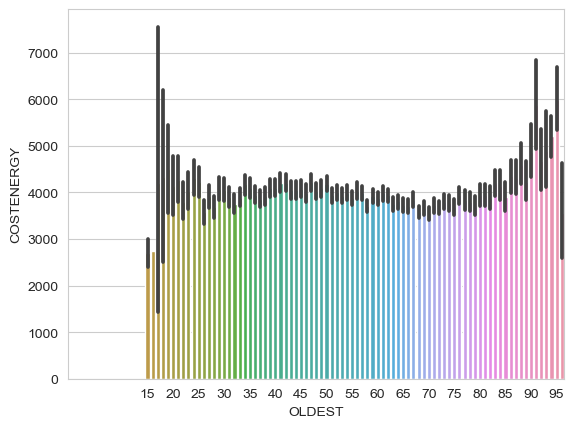

([<matplotlib.axis.XTick at 0x14b50988dc0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95')])

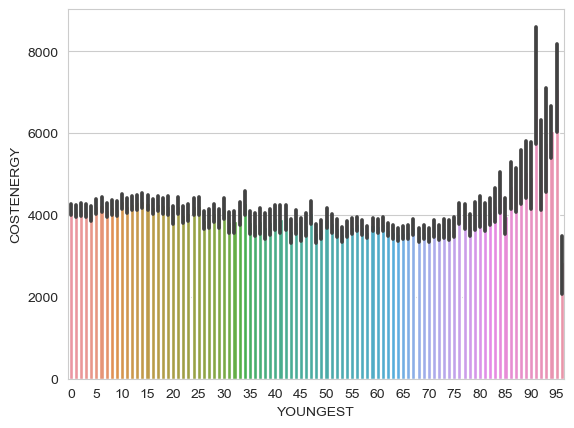

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)